In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import xlrd
xlsfile =pd.ExcelFile('SPEED.xls')

DF =xlsfile.parse('Sheet1')

In [3]:
DF.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
input_vars = ['gender', 'samerace', 'attr', 'sinc', 'intel', 'fun', 'amb',
              'shar', 'like', 'dec', ]
#gender value 0 for women, 1 for men
#samerace has value 1 for having same race, 0 for different races
#attr, sinc, intel, fun, amb, shar has values of partners' attributes after speed date, 1=awful 10=great
#like corresponds to how much the participant liked their matches
#dec_o corresponds to decision after date with value 0 for no, 1 for yes

In [5]:
df = DF.loc[:, input_vars]

In [6]:
df.isnull().sum()
df.dropna(inplace=True)

In [7]:
df.describe()

,gender,samerace,attr,sinc,intel,fun,amb,shar,like,dec
count,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000
mean,0.510047,0.392903,6.194442,7.165313,7.357845,6.396751,6.759655,5.461522,6.130925,0.431238
std,0.499935,0.488430,1.950067,1.741989,1.560403,1.957664,1.797467,2.148612,1.851373,0.495285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,0.000000
50%,1.000000,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,0.000000
75%,1.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,1.000000
max,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [8]:
from sklearn import tree

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
features = df.drop(['dec'], axis=1)
target = df[['dec']]

In [11]:
naive_model = DecisionTreeClassifier(random_state=42)
param_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=10, random_state=42)

In [12]:
def train_and_predict(model, features, target):
    X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy score: %.2f" % accuracy_score(y_test, y_pred))
    (tn, fp, fn, tp) = confusion_matrix(y_test, y_pred).ravel()
    print("confusion matrix")
    print("tn, fp, fn, tp")
    print(tn, fp, fn, tp)
    

In [13]:
train_and_predict(naive_model, features, target)

accuracy score: 0.69
confusion matrix
tn, fp, fn, tp
975 365 354 622


In [14]:
train_and_predict(param_model, features, target)

accuracy score: 0.75
confusion matrix
tn, fp, fn, tp
1017 323 250 726


In [15]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [16]:
dot_data = StringIO()
export_graphviz(param_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)

In [17]:
import pydotplus

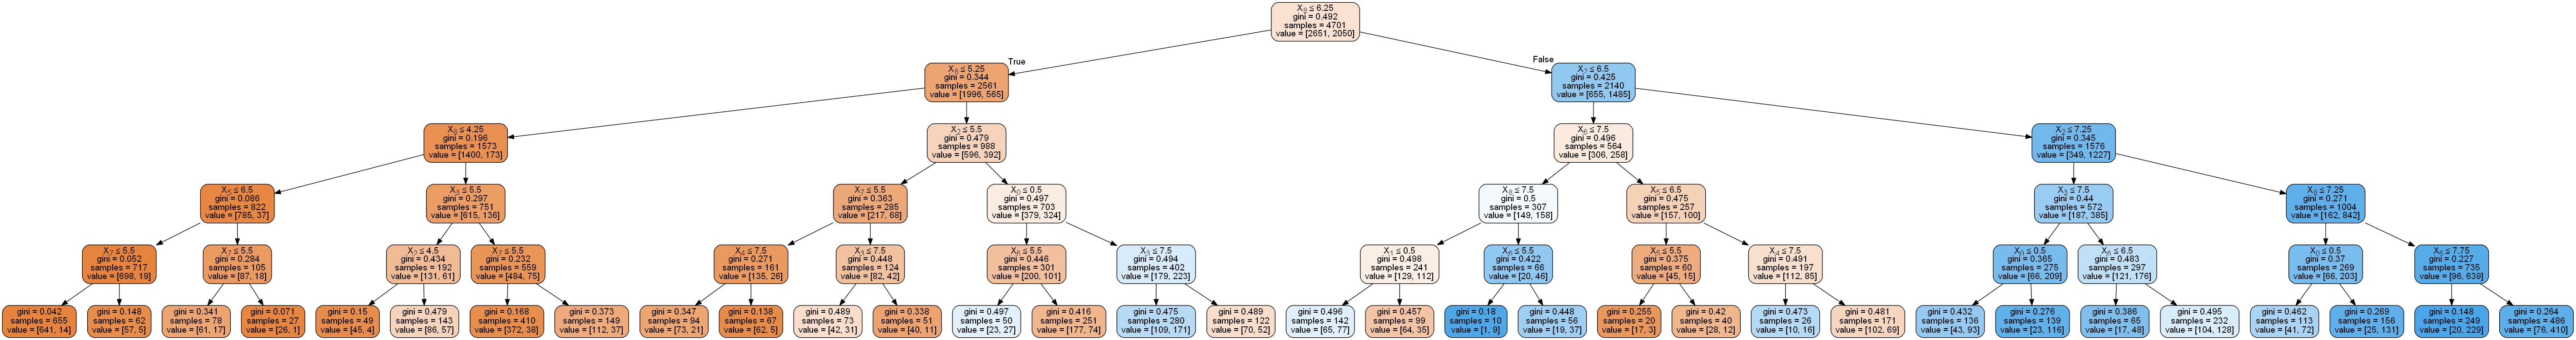

In [18]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [19]:
with open("param_model.dot", "w") as f:
    f = tree.export_graphviz(param_model, out_file=f)
#target

In [20]:
features

,gender,samerace,attr,sinc,intel,fun,amb,shar,like
0,0,0,6.0,9.0,7.0,7.0,6.0,5.0,7.0
1,0,0,7.0,8.0,7.0,8.0,5.0,6.0,7.0
2,0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0
3,0,0,7.0,6.0,8.0,7.0,6.0,8.0,7.0
4,0,0,5.0,6.0,7.0,7.0,6.0,6.0,6.0
5,0,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0
6,0,0,7.0,6.0,7.0,4.0,6.0,7.0,6.0
7,0,0,4.0,9.0,7.0,6.0,5.0,6.0,6.0
8,0,0,7.0,6.0,8.0,9.0,8.0,8.0,7.0
9,0,0,5.0,6.0,6.0,8.0,10.0,8.0,6.0


In [21]:
xtr=features[:100]
xte=features[100:]
ytr=target[:100]
yte=target[100:]

In [22]:
model2=DecisionTreeClassifier()
model2.fit(xtr,ytr)
Prediction=model2.predict(xte)

In [23]:
Prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
yte

,dec
108,0
109,0
110,0
111,0
112,0
113,0
114,0
115,0
116,1
117,1


In [25]:
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
print("Trained Score")
print(confusion_matrix(yte,Prediction))
print(classification_report(yte,Prediction))

Trained Score
[[3029  915]
 [1983  990]]
             precision    recall  f1-score   support

          0       0.60      0.77      0.68      3944
          1       0.52      0.33      0.41      2973

avg / total       0.57      0.58      0.56      6917



In [27]:
#Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
tree=RandomForestClassifier()
model3=tree.fit(xtr,ytr)

C:\Users\Selin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [30]:
Prediction2=model3.predict(xte)

In [31]:
Prediction2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
yte

,dec
108,0
109,0
110,0
111,0
112,0
113,0
114,0
115,0
116,1
117,1


In [33]:
print("Real Values", str(yte.values))
print("Estimated Values", str(Prediction2))

Real Values [[0]
 [0]
 [0]
 ..., 
 [0]
 [0]
 [0]]
Estimated Values [0 0 0 ..., 0 0 0]


In [34]:
print("Error:" , str(np.mean(yte.values!=Prediction2)))

Error: 0.46603673801
